In [1]:
import numpy as np
import os
from PIL import Image
import rioxarray as rio
import matplotlib.pyplot as plt

### Notes on file reading
The code in holodoodler components.py is  
`
Import PIL  
...  
img = PIL.Image.open(path)   
`  
but that does not work in this env. I first tried updating `pillow`, and that resulted in massive updating of the env. After that, `rioxarray` stopped working. 

ImportError: DLL load failed while importing _base: The specified procedure could not be found.

And I still can't use the PIL.Image.open() syntax...I have to write `from PIL import Image`.

Updated `rioxarray` and `GDAL` to make it work.

Update: If we are only reading 3 bands, PIL works fine...tested here.

In [2]:
def read_from_fs(path) -> np.ndarray:
    """Read tif or jpeg as an nd np array.
    """
    fn, ext = os.path.splitext(path)
    print(ext)
    if (ext.lower() == '.jpg') or (ext.lower() == '.jpeg'):
        img = Image.open(path)
        nbands = len(img.getbands())
        # previously, code assumed 4 bands indicated CMYK, but band 4 can also be alpha, so:
        if img.mode == 'CMYK':
            print('Converting to RGB')
            img = img.convert('RGB')
            
        # jpeg array is (nrow, ncol, nband)
        arr = np.array(img)
        
    elif (ext.lower() == '.tif') or (ext.lower == '.tiff'):
        dsx=rio.open_rasterio(path)
        arr = np.array(dsx)
        # tiff array is (nband, nrow, ncol)
        nbands = arr.shape[0]
        print('nbands in tif = ',nbands)
        arr = np.moveaxis(arr, 0, -1)
        
    return arr

In [3]:
def read_from_fs_PIL(path) -> np.ndarray:
    """Read tif or jpeg as an nd np array.
    """
    fn, ext = os.path.splitext(path)
    print(ext)
    
    img = Image.open(path)
    nbands = len(img.getbands())
    mode = img.mode
    print('nbands',nbands,'mode',mode)
    if img.mode == 'CMYK':
        img = img.convert('RGB')

    arr = np.array(img)
    print(arr.shape)
        
    return arr

In [4]:
tiff_path = 'C:/crs/proj/2022_Composite_Experiment/Composite_Experiment/tiff_composites/small_ortho.tif'
jpg_path = 'C:/crs/proj/2022_Composite_Experiment/Composite_Experiment/jpeg_composites/small_ortho.jpg'
# Following cmyk image from https://stackoverflow.com/questions/59853359/how-to-identify-the-cmyk-images-from-image-set-in-python
cmyk_path = 'C:/crs/proj/2022_Composite_Experiment/Composite_Experiment/jpeg_composites/fHxUct.jpg'
mband_path = 'C:/crs/proj/2022_Composite_Experiment/Composite_Experiment/tiff_composites/RGB_EXGR_GRRI_sixband_xr.tif'

.tif
nbands in tif =  6
(800, 1000, 6)


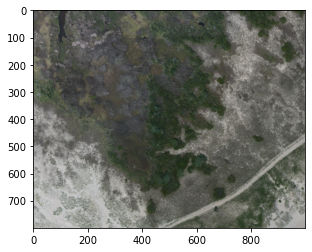

In [5]:
im_array_tif = read_from_fs(mband_path)
print(im_array_tif.shape)
# note: only look at first three bands
plt.imshow(im_array_tif[:,:,0:3])

In [6]:
im_array_tif = read_from_fs_PIL(mband_path)
print(im_array_tif.shape)
# note: only look at first three bands
plt.imshow(im_array_tif[:,:,0:3])

.tif


UnidentifiedImageError: cannot identify image file 'C:/crs/proj/2022_Composite_Experiment/Composite_Experiment/tiff_composites/RGB_EXGR_GRRI_sixband_xr.tif'

.jpg
(800, 1000, 3)


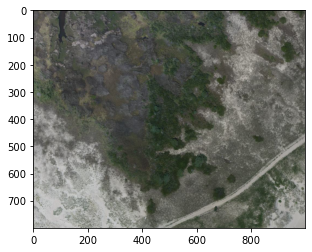

In [7]:
im_array_jpg = read_from_fs(jpg_path)
print(im_array_jpg.shape)
plt.imshow(im_array_jpg)

In [8]:
im_array_cmyk = read_from_fs(cmyk_path)
print(im_array_cmyk.shape)

.jpg
Converting to RGB
(160, 160, 3)
